In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier ,GradientBoostingClassifier,VotingClassifier,StackingClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score ,plot_roc_curve
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv(r'E:\INCEPTEZ\Training\Basics_python\Portuguese Bank\bank-additional\bank-additional-full.csv', sep=',')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.shape

(41188, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
data.describe(include='object').T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


In [7]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

## Data_visualization

<AxesSubplot:>

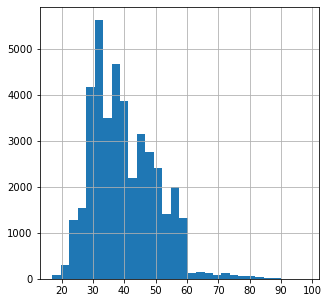

In [9]:
plt.figure(figsize=(5,5))
data['age'].hist(bins=30)

<AxesSubplot:ylabel='Frequency'>

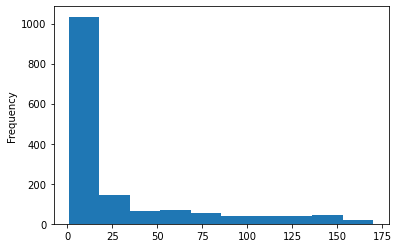

In [10]:
data['duration'].value_counts().plot(kind='hist')

<AxesSubplot:ylabel='contact'>

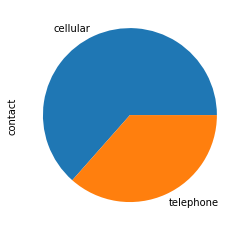

In [11]:
data['contact'].value_counts().plot(kind='pie')

In [12]:
def bivariate_percent_plt(x,y):
    cross = pd.crosstab(x,y)
    cross.div(cross.sum(1),axis=0).plot(kind='bar', stacked=True)


In [13]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

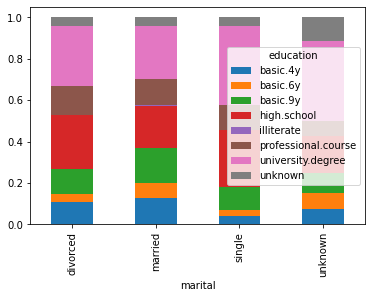

In [14]:
bivariate_percent_plt(data['marital'],data['education'])

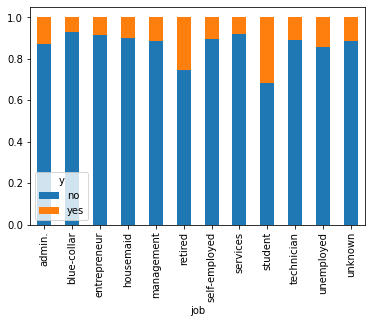

In [15]:
bivariate_percent_plt(data['job'],data['y'])

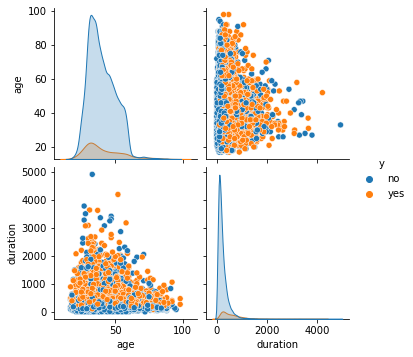

In [16]:
sns.pairplot(data=data, hue='y', vars= ['age', 'duration'])

<AxesSubplot:>

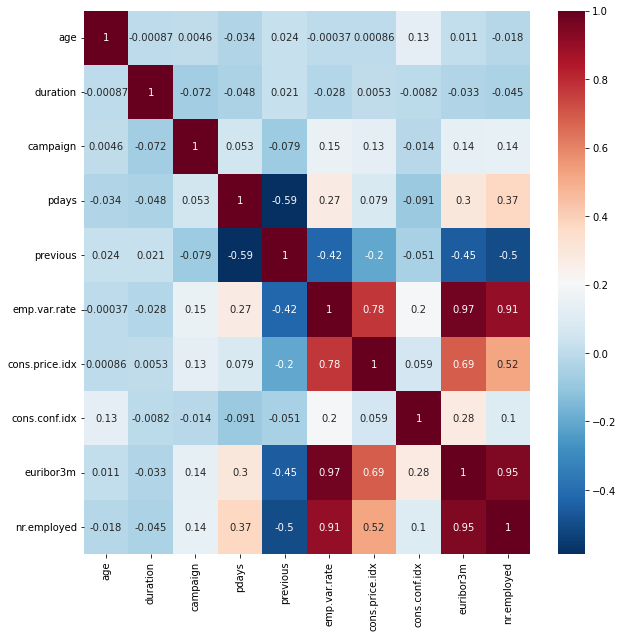

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(data= data.corr(), cmap='RdBu_r' ,annot=True)

In [18]:
object_columns = [i for i in data.columns if data[i].dtype == 'object']
object_columns = object_columns[:-1]
object_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [19]:
numerical_columns = [i for i in data.columns if data[i].dtype in ['int64', 'float64']]
numerical_columns

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [20]:
def dummy_df(df, dummy_col_list):
    for x in dummy_col_list:
        dummies = pd.get_dummies(df[x] , dummy_na=False)
        df =df.drop(x,axis = 1)
        df =pd.concat([df,dummies], axis = 1)
    return df

In [21]:
data =dummy_df(data,object_columns)

In [22]:
data.shape

(41188, 64)

### Removing the duplicated columns

In [23]:
data = data.loc[:,~data.columns.duplicated()]

In [24]:
data.shape

(41188, 55)

### mODELLING PART

In [25]:
X = data.drop(columns=['y'])
y = data['y']

In [26]:
train_X, test_X, train_y , test_y = train_test_split(X,y,test_size=0.2, random_state=24)

In [27]:
train_X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,oct,sep,fri,mon,thu,tue,wed,failure,nonexistent,success
22071,49,125,3,999,0,1.4,93.444,-36.1,4.964,5228.1,...,0,0,0,0,0,0,1,0,1,0
33881,33,296,1,999,0,-1.8,92.893,-46.2,1.281,5099.1,...,0,0,0,0,0,0,1,0,1,0
14583,35,280,2,999,0,1.4,93.918,-42.7,4.961,5228.1,...,0,0,0,0,0,1,0,0,1,0
41159,35,514,1,9,4,-1.1,94.767,-50.8,1.035,4963.6,...,0,0,0,0,0,1,0,0,0,1
16862,52,379,1,999,0,1.4,93.918,-42.7,4.962,5228.1,...,0,0,0,0,1,0,0,0,1,0


In [28]:
def run_model_evaluate(model,train_X,train_y,test_X,test_y):
    model.fit(train_X , train_y)
    #train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)
    #print('train_score:', accuracy_score(train_y , train_pred))
    #print('\nclassification_report\n',classification_report(train_y,train_pred))
    #print('confusion matrix\n',confusion_matrix(train_y,train_pred))
    print('\ntest_score:', accuracy_score(test_y , test_pred))
    print('confusion matrix\n',confusion_matrix(test_y , test_pred))
    print('\nclassification_report\n',classification_report(test_y , test_pred))
    

In [29]:
logistic_reg = LogisticRegression(max_iter=500)
run_model_evaluate(logistic_reg,train_X,train_y,test_X,test_y)


test_score: 0.9084729303228939
confusion matrix
 [[7096  184]
 [ 570  388]]

classification_report
               precision    recall  f1-score   support

          no       0.93      0.97      0.95      7280
         yes       0.68      0.41      0.51       958

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



In [30]:
from tqdm import tqdm
res_score= []
for i in tqdm(range(1,25)):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_X , train_y)
    test_pred = knn.predict(test_X)
    test_score =  accuracy_score(test_y , test_pred)
    res_score.append(1-test_score)
    

100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [03:02<00:00,  7.59s/it]


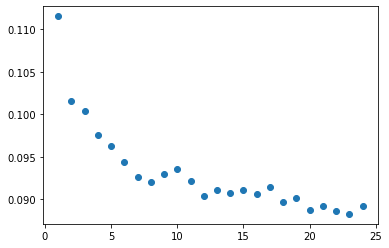

In [31]:
plt.scatter(range(1,25),res_score)

In [32]:
Knn = KNeighborsClassifier(n_neighbors=21)
run_model_evaluate(Knn,train_X,train_y,test_X,test_y)


test_score: 0.9107793153678078
confusion matrix
 [[7029  251]
 [ 484  474]]

classification_report
               precision    recall  f1-score   support

          no       0.94      0.97      0.95      7280
         yes       0.65      0.49      0.56       958

    accuracy                           0.91      8238
   macro avg       0.79      0.73      0.76      8238
weighted avg       0.90      0.91      0.91      8238



In [33]:
Decision_tree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=8)
run_model_evaluate(Decision_tree_entropy,train_X,train_y,test_X,test_y)


test_score: 0.9140568099053168
confusion matrix
 [[6925  355]
 [ 353  605]]

classification_report
               precision    recall  f1-score   support

          no       0.95      0.95      0.95      7280
         yes       0.63      0.63      0.63       958

    accuracy                           0.91      8238
   macro avg       0.79      0.79      0.79      8238
weighted avg       0.91      0.91      0.91      8238



In [34]:
Decision_tree_gini = DecisionTreeClassifier(criterion='gini', max_depth=8)
run_model_evaluate(Decision_tree_gini,train_X,train_y,test_X,test_y)


test_score: 0.9139354212187424
confusion matrix
 [[7003  277]
 [ 432  526]]

classification_report
               precision    recall  f1-score   support

          no       0.94      0.96      0.95      7280
         yes       0.66      0.55      0.60       958

    accuracy                           0.91      8238
   macro avg       0.80      0.76      0.77      8238
weighted avg       0.91      0.91      0.91      8238



In [35]:
Random_forest_entropy = RandomForestClassifier(criterion='entropy', max_depth=25, n_estimators = 200)
run_model_evaluate(Random_forest_entropy,train_X,train_y,test_X,test_y)


test_score: 0.9102937606215101
confusion matrix
 [[7052  228]
 [ 511  447]]

classification_report
               precision    recall  f1-score   support

          no       0.93      0.97      0.95      7280
         yes       0.66      0.47      0.55       958

    accuracy                           0.91      8238
   macro avg       0.80      0.72      0.75      8238
weighted avg       0.90      0.91      0.90      8238



In [36]:
Random_forest_gini = RandomForestClassifier(criterion='gini', max_depth=24, n_estimators = 200)
run_model_evaluate(Random_forest_gini,train_X,train_y,test_X,test_y)


test_score: 0.9123573682932751
confusion matrix
 [[7044  236]
 [ 486  472]]

classification_report
               precision    recall  f1-score   support

          no       0.94      0.97      0.95      7280
         yes       0.67      0.49      0.57       958

    accuracy                           0.91      8238
   macro avg       0.80      0.73      0.76      8238
weighted avg       0.90      0.91      0.91      8238



In [37]:
gaussian = GaussianNB()
run_model_evaluate(gaussian,train_X,train_y,test_X,test_y)


test_score: 0.8630735615440641
confusion matrix
 [[6622  658]
 [ 470  488]]

classification_report
               precision    recall  f1-score   support

          no       0.93      0.91      0.92      7280
         yes       0.43      0.51      0.46       958

    accuracy                           0.86      8238
   macro avg       0.68      0.71      0.69      8238
weighted avg       0.87      0.86      0.87      8238



In [40]:
ada_boost = AdaBoostClassifier()
run_model_evaluate(ada_boost,train_X,train_y,test_X,test_y)


test_score: 0.9067734887108522
confusion matrix
 [[7093  187]
 [ 581  377]]

classification_report
               precision    recall  f1-score   support

          no       0.92      0.97      0.95      7280
         yes       0.67      0.39      0.50       958

    accuracy                           0.91      8238
   macro avg       0.80      0.68      0.72      8238
weighted avg       0.89      0.91      0.90      8238



In [61]:
GradientBoosting = GradientBoostingClassifier(max_depth=4, min_samples_leaf=4, n_estimators=75)
run_model_evaluate(GradientBoosting,train_X,train_y,test_X,test_y)


test_score: 0.9163631949502307
confusion matrix
 [[7020  260]
 [ 429  529]]

classification_report
               precision    recall  f1-score   support

          no       0.94      0.96      0.95      7280
         yes       0.67      0.55      0.61       958

    accuracy                           0.92      8238
   macro avg       0.81      0.76      0.78      8238
weighted avg       0.91      0.92      0.91      8238



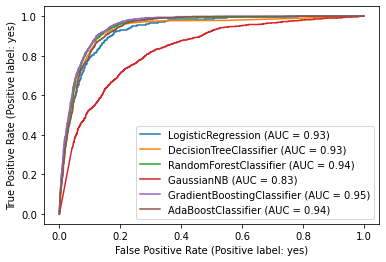

In [93]:
# ROC plot
classifiers = [logistic_reg, Decision_tree_entropy,Random_forest_gini,gaussian,GradientBoosting,ada_boost]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, test_X, test_y, ax=ax)

In [42]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [87]:
parameters ={'n_estimators':[25,50,75,100,150],'max_depth':[1,2,3,4,5,6],'min_samples_leaf':[1,2,3,4,5,6]}
parameter={'n_estimators':[25,50,75,100,150]}

In [88]:
%%time
model = AdaBoostClassifier()
randomsearch =RandomizedSearchCV(model,parameter, verbose=1 , scoring='accuracy')
randomsearch.fit(train_X, train_y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Wall time: 2min 47s


RandomizedSearchCV(estimator=AdaBoostClassifier(),
                   param_distributions={'n_estimators': [25, 50, 75, 100, 150]},
                   scoring='accuracy', verbose=1)

In [89]:
randomsearch.best_estimator_

AdaBoostClassifier(n_estimators=75)

In [90]:
randomsearch.best_score_

0.9104097116843703

In [91]:
train_pred = randomsearch.predict(train_X)
accuracy_score(train_y , train_pred)

0.9111684370257966

In [92]:
test_pred = randomsearch.predict(test_X)
accuracy_score(test_y , test_pred)

0.9066521000242778

### voting

In [101]:
model1 =LogisticRegression()
model2 =RandomForestClassifier()
model3 =GradientBoostingClassifier()
model4 = KNeighborsClassifier()
model5 = AdaBoostClassifier()
model6 =DecisionTreeClassifier()

In [102]:
voting = VotingClassifier(estimators = [('lr',model1),('rf',model2),('gra',model3),('knn',model4),('ada',model5),('dt',model6)], voting='hard')

In [103]:
run_model_evaluate(voting,train_X,train_y,test_X,test_y)


test_score: 0.9098082058752124
confusion matrix
 [[7115  165]
 [ 578  380]]

classification_report
               precision    recall  f1-score   support

          no       0.92      0.98      0.95      7280
         yes       0.70      0.40      0.51       958

    accuracy                           0.91      8238
   macro avg       0.81      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



### Stacking

In [104]:
model1 =LogisticRegression()
model2 =RandomForestClassifier()
model4 = KNeighborsClassifier()
model5 = AdaBoostClassifier()
model6 =DecisionTreeClassifier()
gra =GradientBoostingClassifier()

In [105]:
estimators = [('lr',model1),('rf',model2),('gra',model3),('knn',model4),('ada',model5),('dt',model6)]

In [107]:
Stack =StackingClassifier(estimators=estimators,final_estimator=gra )

In [109]:
run_model_evaluate(Stack,train_X,train_y,test_X,test_y)


test_score: 0.9136926438455936
confusion matrix
 [[6984  296]
 [ 415  543]]

classification_report
               precision    recall  f1-score   support

          no       0.94      0.96      0.95      7280
         yes       0.65      0.57      0.60       958

    accuracy                           0.91      8238
   macro avg       0.80      0.76      0.78      8238
weighted avg       0.91      0.91      0.91      8238

